In [1]:
!matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
# Define the path to your CSV file
file_path = '/home/alejandro/Desktop/Fre.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path, index_col='Date',parse_dates=True)
data.drop(data.columns[0], axis=1, inplace=True)
data.columns =['west','east']
data['Total'] = data['west'] + data['east']
data.head()

Traceback (most recent call last):
  File "/home/alejandro/miniconda3/envs/ale_analysis/bin/matplotlib", line 11, in <module>
    sys.exit(plotting._matplotlib())
AttributeError: module 'pandas.plotting' has no attribute '_matplotlib'


/tmp/ipykernel_13664/3486645334.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, index_col='Date',parse_dates=True)


,west,east,Total
Date,,,
2012-10-02 13:00:00,7.0,48.0,55.0
2012-10-02 14:00:00,55.0,75.0,130.0
2012-10-02 15:00:00,81.0,71.0,152.0
2012-10-02 16:00:00,167.0,111.0,278.0
2012-10-02 17:00:00,393.0,170.0,563.0


In [48]:
# unsekkjsdljsvdfvljhdklcdskljdslkjclkadsjcc

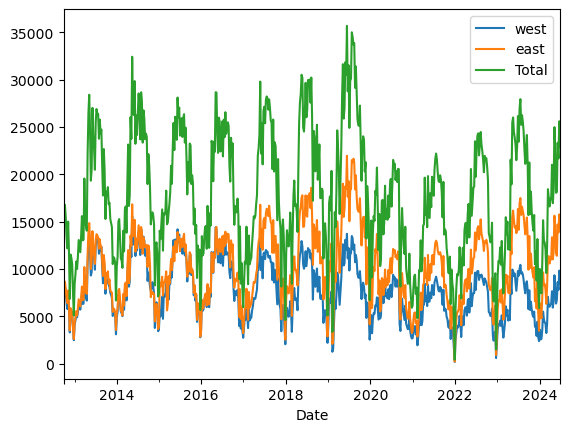

In [2]:
data.resample('W').sum().plot();

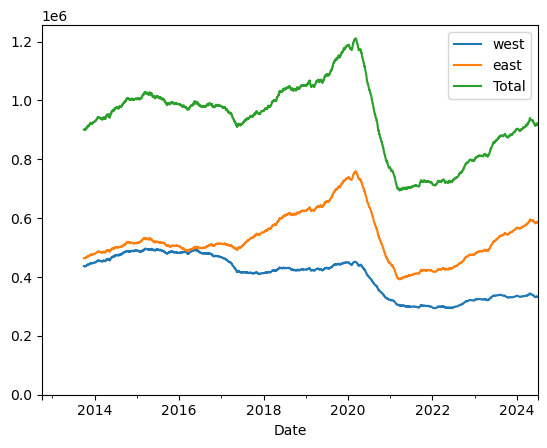

In [3]:
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

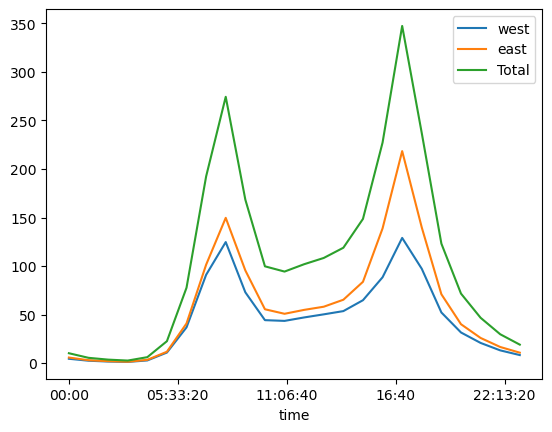

In [4]:
data.groupby(data.index.time).mean().plot();

In [20]:
pivotes = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivotes.iloc[:5,:5]

,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06
00:00:00,NaN,13.0,18.0,11.0,15.0
01:00:00,NaN,10.0,3.0,8.0,15.0
02:00:00,NaN,2.0,9.0,7.0,9.0
03:00:00,NaN,5.0,3.0,4.0,3.0
04:00:00,NaN,7.0,8.0,9.0,5.0


In [6]:
pivotes.plot(legent=False, aplha=0.01);


AttributeError: Line2D.set() got an unexpected keyword argument 'legent'

Error in callback <function _draw_all_if_interactive at 0x7fe19d807af0> (for post_execute):


ValueError: microsecond must be in 0..999999

ValueError: microsecond must be in 0..999999

<Figure size 640x480 with 1 Axes>

In [7]:
x=pivotes.fillna(0).T.values
x.shape

(4290, 24)

In [12]:
from sklearn.decomposition import PCA
x2 = PCA(2, svd_solver ='full').fit_transform(x)

In [13]:
x2.shape

(4290, 2)

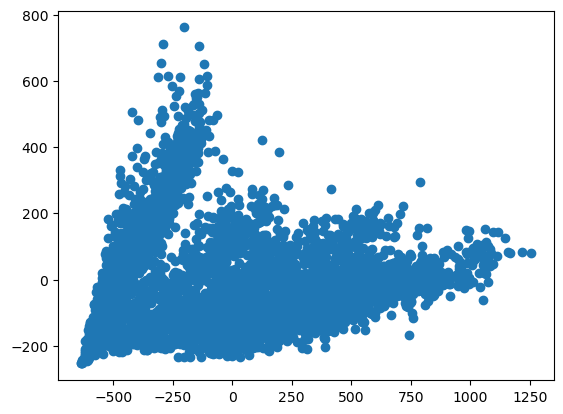

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x2[:,0],x2[:,1])

In [15]:
from sklearn.mixture import GaussianMixture
gmm =GaussianMixture(2)
gmm.fit(x)
labels = gmm.predict(x) 
labels

array([0, 0, 0, ..., 0, 1, 1])

<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

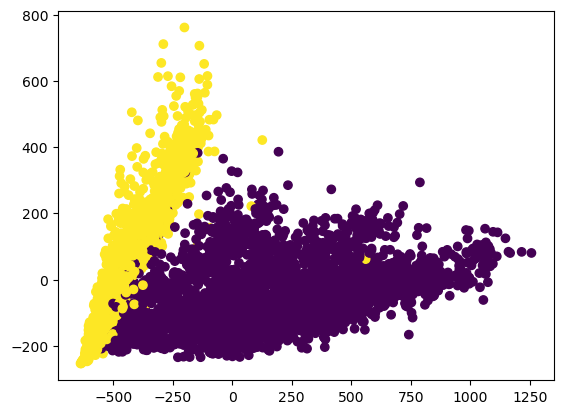

In [17]:
plt.scatter(x2[:,0],x2[:,1], c=labels)
plt.colorbar

Text(0.5, 1.0, 'yellow')

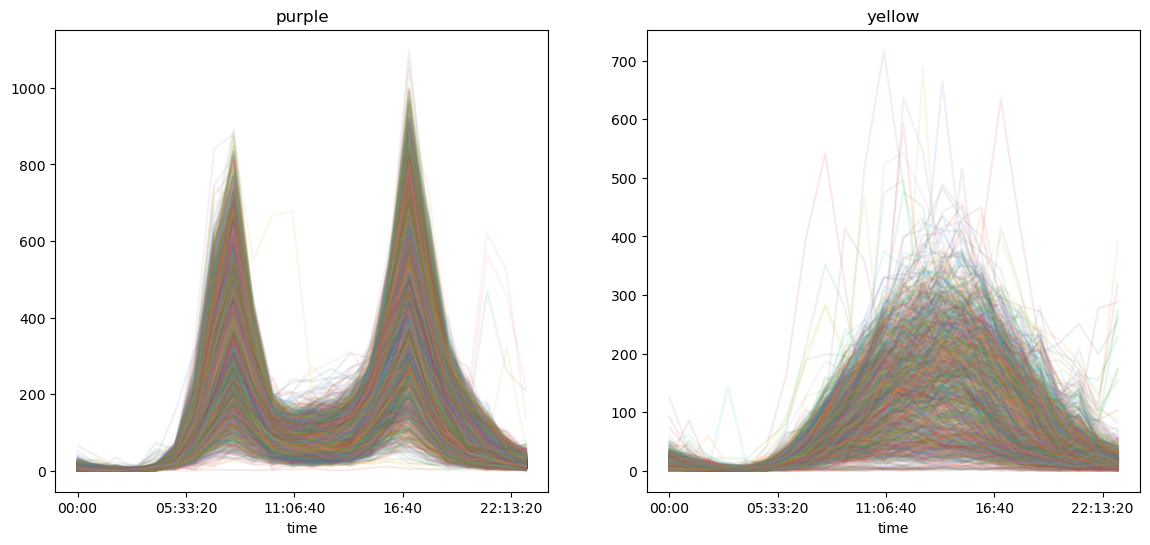

In [44]:
fig, ax = plt.subplots(1,2, figsize=[14,6])

pivotes.T[labels ==0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivotes.T[labels ==1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('purple')
ax[1].set_title('yellow')

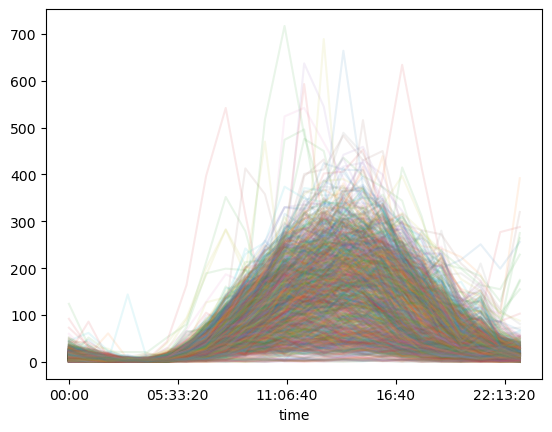

In [35]:
dayofweek= pd.DatetimeIndex(pivotes.columns).dayofweek

<function matplotlib.pyplot.colorbar(mappable: 'ScalarMappable | None' = None, cax: 'matplotlib.axes.Axes | None' = None, ax: 'matplotlib.axes.Axes | Iterable[matplotlib.axes.Axes] | None' = None, **kwargs) -> 'Colorbar'>

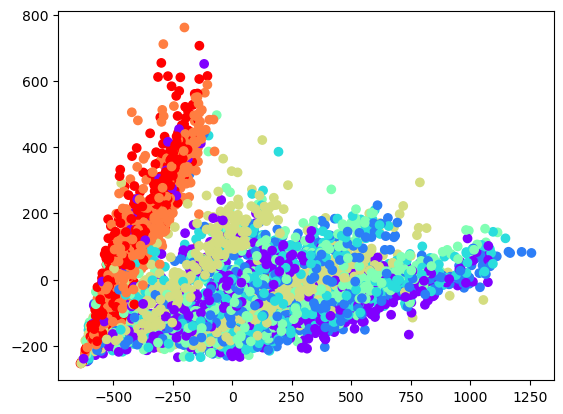

In [37]:

plt.scatter(x2[:,0],x2[:,1],c=dayofweek, cmap="rainbow")
plt.colorbar

In [40]:
dates=pd.DatetimeIndex(pivotes.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29',
               ...
               '2023-11-23', '2023-11-24', '2023-12-22', '2023-12-25',
               '2023-12-26', '2023-12-29', '2024-01-01', '2024-01-15',
               '2024-05-27', '2024-06-21'],
              dtype='datetime64[ns]', length=122, freq=None)